The Distribution of Money <br> 
Simulation 477 <br> 
By Grant Smith and Leo Petersen <br>

We represent the model using an numpy array of integers as our "agents" such that the money held the $i^{th}$ agent is `agents[i]`. We also maintain an index list as a range, `range(0, num_of_agents)`, mapped to our agents array for convience so we can get pull 2 random index values, $i, j$ without the risk of returning the same agent twice. We then create a money constant, $m$, which is the sum of the money held by the $i^{th}$ and $j^{th}$ agents. Finally, we overwrite the $i^{th}$ agent to have $\epsilon$% of $m$ while the  $j^{th}$ agent is set to ($1 - \epsilon$)% of $m$. Note that a higher value of $\epsilon$ is better for agent $i$, while a lower value is better for $j$. This system is also closed, meaning the total amount of money amongst all agents never changes. 

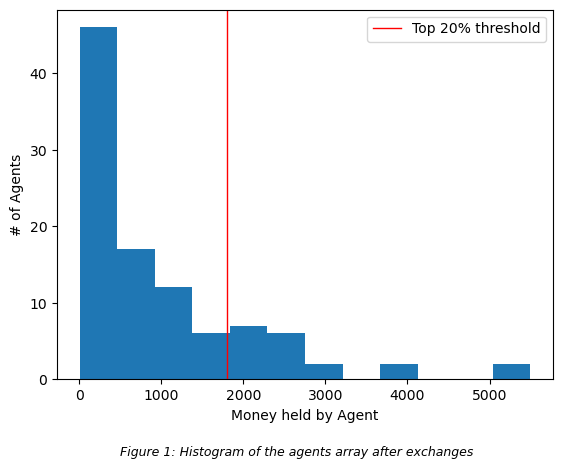

Top 20% of agents hold 55.7% of total wealth


In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

num_of_agents = 100 # N = 100 as specified
m0 = 1000 # m_0 = 1000 as specified

agents = np.full(num_of_agents, m0, dtype=float)

indexlist = list(range(num_of_agents))

for i in range(100000): # Run until equilibrium
    epsilon = random.uniform(0, 1)
    index = random.sample(indexlist, 2)
    money = agents[index[0]] + agents[index[1]]
    agents[index[0]] = epsilon*money
    agents[index[1]] = (1-epsilon)*money

# Show the histogram
plt.hist(agents, bins='auto')
plt.xlabel('Money held by Agent')
plt.ylabel('# of Agents')
plt.figtext(0.5, -0.05, "Figure 1: Histogram of the agents array after exchanges", wrap=True, style='italic', horizontalalignment='center', fontsize=9) # Caption
sorted_agents = np.sort(agents)
plt.axvline(sorted_agents[int(0.8 * num_of_agents)], color='red', linewidth=1, label='Top 20% threshold')
plt.legend() # Required to show axvline
plt.show()

sorted_agents = np.sort(agents)
top_20_wealth = np.sum(sorted_agents[int(0.8 * num_of_agents):]) #
total_wealth = np.sum(agents)
ratio = top_20_wealth / total_wealth * 100
print(f"Top 20% of agents hold {ratio:.1f}% of total wealth")

The results of *Figure 1* show a clear bias towards the poor (~2000) in distribution. We found that with a low value of $M$, a majority of agents will not be selected to trade and thus their money will never change, leading to majority of agents being exactly 1000. As $N$ increases however, a greater number of agents give money to the top 20% of agents. Thus it appears that this model follows *Pareto's Law* and converges to an 80:20 wealth:agent ratio as we increased $N$ up to a certain point. We question if there is some value of $N$ where *Pareto's Law* "breaks" and results in a more severe wealth:agent ratio, such as a single agent possessing all of the money. We also question how these 20% agents trade with a favorable $\epsilon$ value and propose 2 hypothesises on how an agent is able to get to the top 20% threshold. Either they are able to trade some number of times with a largely favorable $\epsilon$ value (think a few 90% trades for a given agent near the end of the simulation) or because they consistently trade with a favorable $\epsilon$ value (think 51% across all passes). Hypothesis 1 implies that there are few agents in the simulation which hold high values of wealth, but *Figure 1* only reports the agents who won against the "rich" agents at the end, as those rich agents take the place of poor agents would become poor after the exchange. Hypothesis 2 implies a more gradual buildup across the simulation and seems to suggest that to keep wealth and/or keep the other agents poor it is more important to not lose an exchange.

## Part B: Savings Model

Now we implement the savings model where agents save a fraction $\lambda$ of their money before the transaction. We test $\lambda$ = 0.25, 0.50, 0.75, and 0.9.

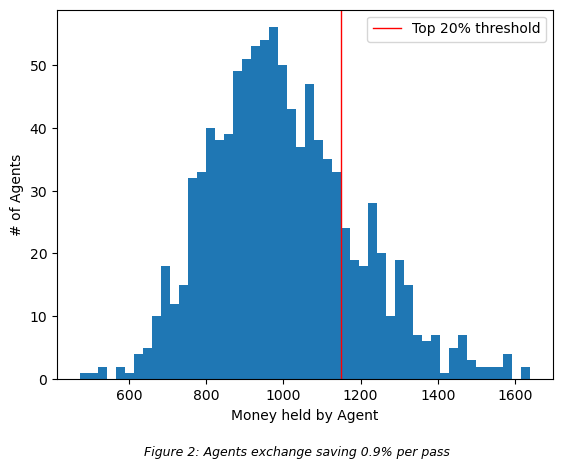

Top 20% of agents hold 25.7% of total wealth


In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

transactions = 1000000 # Number of times we distribute money (for some values of lambda, we may need to increase this to 10^7 reach equilibrium)

num_of_agents = 1000 # Number of individual agents
indexlist = list(range(0, num_of_agents))

agents = np.full(num_of_agents, 1000, dtype=float) # Create the array of agents with initial money

lambda_val = 0.9 # Saving factor (0, 0.25, 0.5, 0.75, 0.9)

for i in range(transactions):
    epsilon = random.uniform(0, 1)
    index = random.sample(indexlist, 2)
    money = (1-lambda_val) * ((agents[index[1]]*epsilon)-(1-epsilon)*agents[index[0]])
    agents[index[0]] += money
    agents[index[1]] -= money

plt.hist(agents, bins=50)
plt.xlabel('Money held by Agent')
plt.ylabel('# of Agents')
plt.figtext(0.5, -0.05, f"Figure 2: Agents exchange saving {lambda_val}% per pass", wrap=True, style='italic', horizontalalignment='center', fontsize=9) # Caption
sorted_agents = np.sort(agents)
plt.axvline(sorted_agents[int(0.8 * num_of_agents)], color='red', linewidth=1, label='Top 20% threshold')
plt.legend() # Required to show axvline
plt.show()

# Pareto's law check: Do top 20% of agents hold about 80% of wealth?
sorted_agents = np.sort(agents)
top_20_wealth = np.sum(sorted_agents[int(0.8 * num_of_agents):]) #
total_wealth = np.sum(agents)
ratio = top_20_wealth / total_wealth * 100
print(f"Top 20% of agents hold {ratio:.1f}% of total wealth")

### Does the form of $f(m)$ change for $\lambda > 0$?

**Yes, the form of $f(m)$ changes significantly for $\lambda > 0$.** For $\lambda = 0$, the distribution is exponential with most agents poor and a long tail of wealthy agents. As $\lambda$ increases, the distribution becomes more Gaussian-like and centered around $m_0$. The standard deviation decreases with larger $\lambda$, meaning wealth becomes more evenly distributed. This makes sense: when agents save a larger fraction of their money, they protect themselves from large losses, preventing the extreme inequality seen in the $\lambda = 0$ case.

### Pareto's law check: Do top 20% of agents hold ~80% of wealth?

For $\lambda$ = 0, we find the top 20% of agents hold approximately 51.9% of the wealth. As $\lambda$ increases, this ratio decreases (e.g., $\lambda$ = 0.9 gives 25.5%), indicating that savings reduce wealth inequality.